## Quasars 

1. Upsample this distribution in two ways, using both rejection sampling and inverse transform.
2. Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
3. Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

In [1]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

z = data['redshift']

In [2]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\2384231292.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts, bins, _ = plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', color='blue', alpha=1, label='z', density=True)


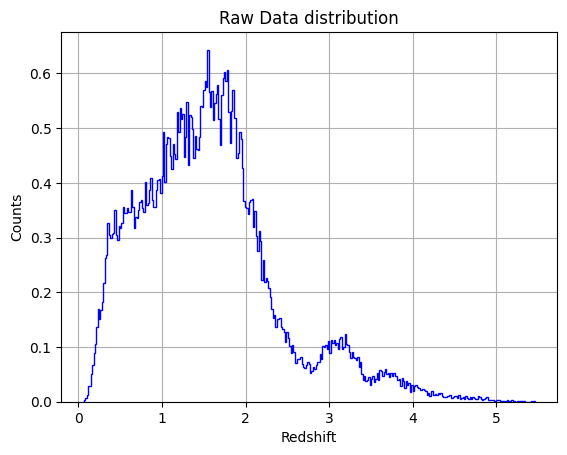

In [15]:
counts, bins, _ = plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', color='blue', alpha=1, label='z', density=True)
plt.title('Raw Data distribution')
plt.ylabel('Counts')
plt.xlabel('Redshift')
plt.grid()

### Rejection Sampling

In [5]:
xmax = max(bins)
xmin = min(bins)
N    = int(1e5) # Number of numbers with which I want to sample th e distribution

In [9]:
x = np.random.randint(0,len(bins)-1, N)
y = np.random.uniform(0,max(counts),N)

C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\396056370.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', color='blue', alpha=1, label='z', density=True)


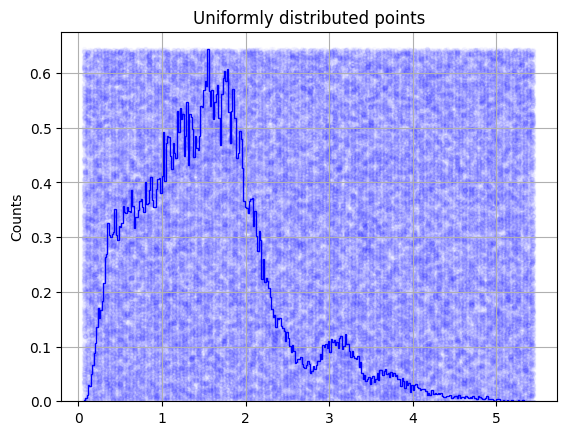

In [21]:
plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', color='blue', alpha=1, label='z', density=True)
plt.scatter(bins[x],y, marker='.', color='blue', alpha=0.02)
plt.title('Uniformly distributed points')
plt.ylabel('Counts')
plt.grid()

In [16]:
yvals = []
xvals = []
for i,k in enumerate(x):
    if y[i] < counts[k]:
        yvals.append(y[i])
        xvals.append(bins[x[i]])
        
yvals = np.array(yvals)
xvals = np.array(xvals)

C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\4095690309.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', color='blue', alpha=1, label='z', density=True)


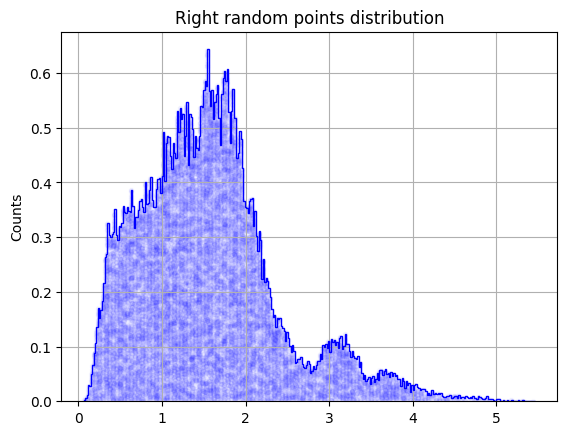

In [20]:
plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', color='blue', alpha=1, label='z', density=True)
plt.scatter(xvals,yvals, marker='.', color='blue', alpha=0.02)
plt.title('Right random points distribution')
plt.ylabel('Counts')
plt.grid()

In [22]:
final = np.concatenate((z, xvals))

C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\4251104086.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', label='Raw data Distribution', color='blue', alpha=1, density=True)
C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\4251104086.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(final, bins=int(np.sqrt(final.shape)), histtype='step', label='Upsampled Distribution', color='red', alpha=1, density=True)


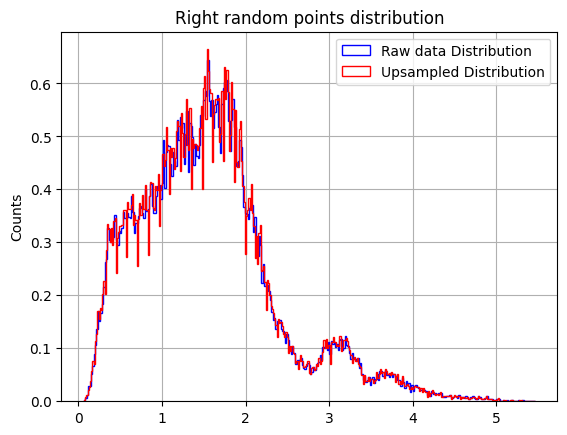

In [24]:
plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', label='Raw data Distribution', color='blue', alpha=1, density=True)
plt.hist(final, bins=int(np.sqrt(final.shape)), histtype='step', label='Upsampled Distribution', color='red', alpha=1, density=True)
plt.title('Right random points distribution')
plt.ylabel('Counts')
plt.legend()
plt.grid()

Now we can do this with Inverse transform\
Thus we have to compute the cumulative function

In [25]:
bin_centers = (bins[:-1] + bins[1:]) / 2

Normalization constant

Cumulative sum

In [49]:
C = np.cumsum(counts) * np.diff(bins)[0]

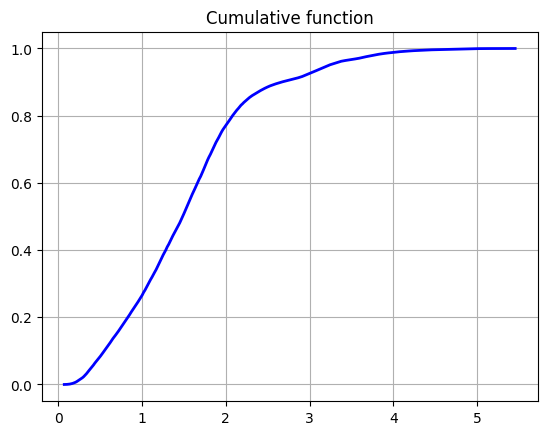

In [50]:
plt.plot(bin_centers,C, label='C', color='blue', linestyle='-', linewidth=2)
plt.title('Cumulative function')
plt.grid()

In [51]:
u = np.random.uniform(min(C),max(C),N)

In [52]:
values = np.array([bin_centers[np.where(C<k)[0].astype(int)][-1] for k in u])

In [53]:
final2 = np.concatenate((z, values))

C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\3990254096.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(final2, bins=int(np.sqrt(final2.shape)), histtype='step', label='Upsampled Data using INV', color='blue', alpha=1, density=True)
C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\3990254096.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', label='Raw data Distribution', linewidth=2, color='red', alpha=1, density=True)
C:\Users\ricca\AppData\Local\Temp\ipykernel_12428\3990254096.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprec

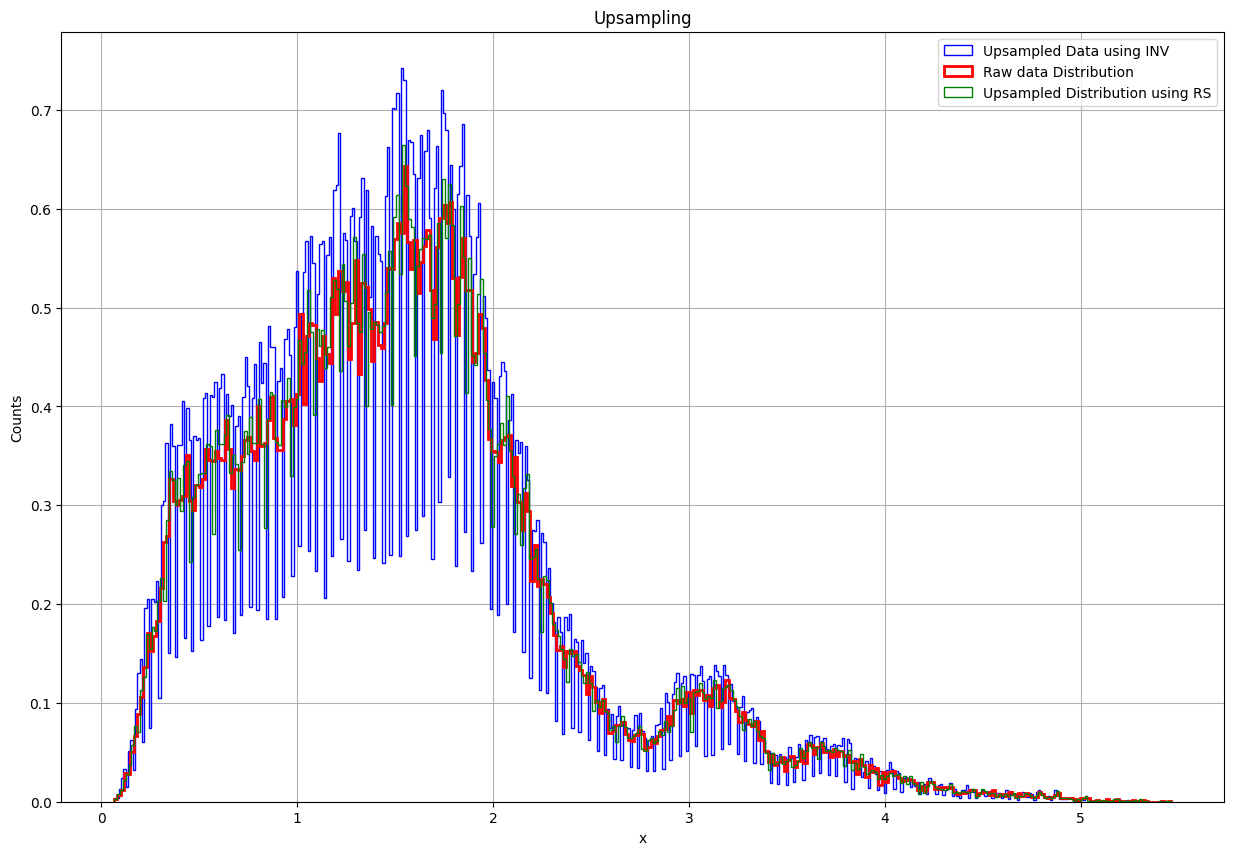

In [54]:
plt.figure(figsize=(15,10))
plt.hist(final2, bins=int(np.sqrt(final2.shape)), histtype='step', label='Upsampled Data using INV', color='blue', alpha=1, density=True)
plt.hist(z, bins=int(np.sqrt(z.shape)), histtype='step', label='Raw data Distribution', linewidth=2, color='red', alpha=1, density=True)
plt.hist(final, bins=int(np.sqrt(final.shape)), histtype='step', label='Upsampled Distribution using RS', color='green', alpha=1, density=True)
plt.grid()
plt.title('Upsampling')
plt.xlabel('x')
plt.ylabel('Counts')
plt.legend()